In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
precip_analysis=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-24").\
    filter(Measurement.date <= "2017-08-23").all()
precip_df=pd.DataFrame(precip_analysis)

precip_df["date"]=pd.to_datetime(precip_df["date"])
precip_df=precip_df.set_index("date")

precip_df=precip_df.rename(columns= {"prcp": "precipitation"})

precip_df.head()

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


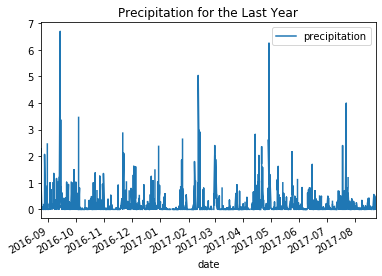

In [9]:
precip_df.plot(title= "Precipitation for the Last Year")


In [10]:
precip_df.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [11]:
station_count= session.query(Station.station).count()
station_count

9

In [12]:
station_activity = session.query(Measurement.station, Station.name, func.count(Measurement.tobs)).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()

station_activity

[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [ ]:
station_activity[0]


In [13]:
for row in reversed(station_activity):      
    most_active_station=row.station
    most_active_name=str(row.name)

In [14]:
highest_tobs = session.query(Measurement.tobs).\
filter(Measurement.station == most_active_station, Measurement.station == Station.station,\
       Measurement.date >="2016-08-24", Measurement.date <="2017-08-23").all()

temperatures= [temp[0] for temp in highest_tobs]

Text(0.5, 0, 'Temperature')

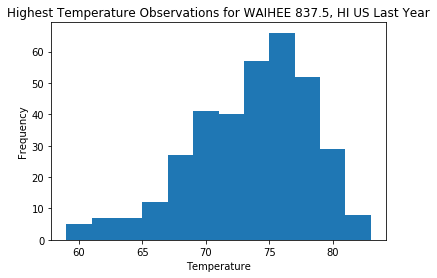

In [15]:
plt.hist(temperatures, bins=12)
plt.title("Highest Temperature Observations for " + (most_active_name) + " Last Year")
plt.ylabel("Frequency")
plt.xlabel("Temperature")